In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as LA
import scipy.integrate as integ
from scipy.fft import fft,ifft

In [2]:
t0  = 0
tf = 4000
dt = 0.1

dx = 0.1
xmax = 8

seperation = 6
#nmeasure = 1000




In [3]:
ts = np.arange(t0,tf+dt,dt,dtype = np.complex64)
xs = np.arange(-xmax,xmax+dx,dx,dtype = np.complex64)

nt = np.size(ts)
N = np.size(xs)

ks = np.linspace(-N/2,N/2-1,N,dtype = np.complex64)*(2*np.pi)/(N*dx)
w = 1

Vx=0.5*(abs(xs)-seperation/2)**2
T = 0.5*ks**2

c:\Users\Emil\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


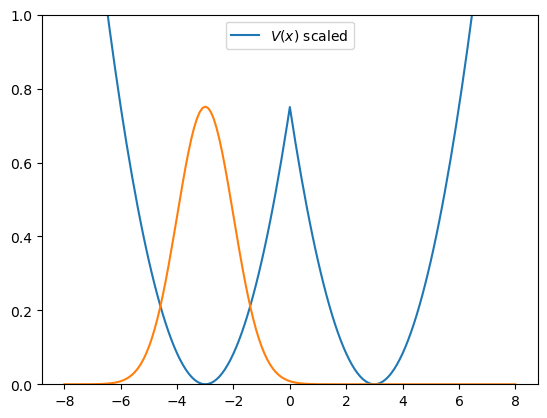

In [4]:
plt.plot(xs,Vx/6,label = r'$V(x)$ scaled')
#psi_0 = 1/np.sqrt(2)*((w/np.pi)**(1/4))*((np.exp(-xs**2/2))+np.sqrt(2)*xs*np.exp(-xs**2/2))
#plt.plot(xs,psi_0**2,label = r'$\vert \Psi^2\vert$')
plt.ylim(0,1)
plt.legend()
def psi0(x):
    return np.pi**(-1/4)*np.exp(-x**2/2)
psi_init = psi0(xs+seperation/2)
plt.plot(xs,psi_init)

In [5]:
def split_step_propagate(V,T,delta_t,psi):
    phi = fft(psi)
    phi=phi*np.exp(-1j*T*delta_t/2)
    psi = ifft(phi)
    psi=psi*np.exp(-1j*V*delta_t)
    phi = fft(psi)
    phi= phi*np.exp(-1j*T*delta_t/2)
    psi = ifft(phi)
    return psi
t = t0
# while t<tf:
#     t+=dt
#     psi = split_step_propagate(Vx,T,dt,psi)
# print(integ.trapezoid(np.abs(psi)**2,xs))


[-8.00000000e+00+0.j -7.90000010e+00+0.j -7.80000019e+00+0.j
 -7.70000029e+00+0.j -7.60000038e+00+0.j -7.50000048e+00+0.j
 -7.40000057e+00+0.j -7.30000067e+00+0.j -7.20000076e+00+0.j
 -7.10000086e+00+0.j -7.00000095e+00+0.j -6.90000105e+00+0.j
 -6.80000114e+00+0.j -6.70000124e+00+0.j -6.60000134e+00+0.j
 -6.50000143e+00+0.j -6.40000153e+00+0.j -6.30000162e+00+0.j
 -6.20000172e+00+0.j -6.10000181e+00+0.j -6.00000191e+00+0.j
 -5.90000200e+00+0.j -5.80000210e+00+0.j -5.70000219e+00+0.j
 -5.60000229e+00+0.j -5.50000238e+00+0.j -5.40000248e+00+0.j
 -5.30000257e+00+0.j -5.20000267e+00+0.j -5.10000277e+00+0.j
 -5.00000286e+00+0.j -4.90000296e+00+0.j -4.80000305e+00+0.j
 -4.70000315e+00+0.j -4.60000324e+00+0.j -4.50000334e+00+0.j
 -4.40000343e+00+0.j -4.30000353e+00+0.j -4.20000362e+00+0.j
 -4.10000372e+00+0.j -4.00000381e+00+0.j -3.90000391e+00+0.j
 -3.80000401e+00+0.j -3.70000410e+00+0.j -3.60000420e+00+0.j
 -3.50000429e+00+0.j -3.40000439e+00+0.j -3.30000448e+00+0.j
 -3.20000458e+00+0.j -3.

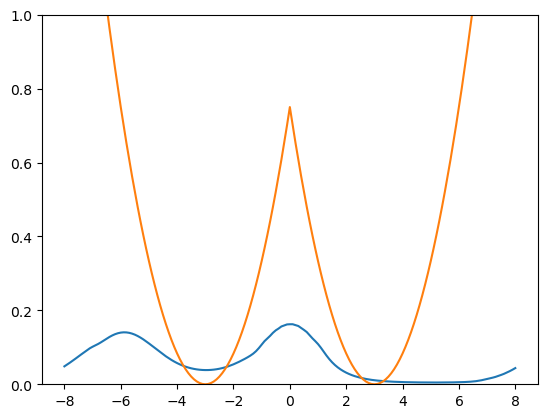

In [6]:
plt.plot(xs,np.abs(split_step_propagate(Vx,T,dt,psi_init))**2)
plt.plot(xs,Vx/6)
plt.ylim(0,1)
print(xs)